<a href="https://colab.research.google.com/github/shshinc/Habig/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HaBig**
 - 본 모델은 사용자가 물을 마셨는지, 청소를 했는지 확인하기 위해 제작되었습니다.

 - 사용자가 물을 마셨을 경우, 텀블러나 컵 사진을 찍어 올리게 되면 물을 마셨다고 인증할 계획입니다.

 - 사용자가 청소를 했더라면 청소기 사진을 찍어 올려 청소를 했다고 인증할 계획입니다.

 - 제작 방법
  1. 이미지 크롤링(image crawling)

  2. 전이 학습
  
  3. 웹API 개발

In [1]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), 17.48 KiB | 436.00 KiB/s, done.


 1. 이미지 크롤링을 활용한 학습 이미지 수집
 - 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [2]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

 - cup 이미지를 크롤링을 진행하고 데이터셋을 구축합니다.

In [3]:
query = 'cup'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://www.collinsdictionary.com/images/full/cup_126346628.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://pics.clipartpng.com/idownload-image.php?file=Blue_Cup_PNG_Clipart-1037.png)
[Error] Invalid image, not saving https://pics.clipartpng.com/idownload-image.php?file=Blue_Cup_PNG_Clipart-1037.png
[Info] Issue getting: https://pics.clipartpng.com/idownload-image.php?file=Blue_Cup_PNG_Clipart-1037.png
[Error] No active exception to reraise
#2 이미지 다운로드 (http://static.squarespace.com/static/52f366cae4b0b5c2c6471998/5379d284e4b0cb63d6fbf706/5379d2c2e4b05f3bc93615e4/1400492738991/Day%2013%20Espresso%20Shot%20Cup.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://www.pngall.com/wp-content/uploads/4/Cup-PNG-Image-File.png)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://static.squarespace.com/static/52f366cae4b0b5c2c6471998/5379d284e4b0cb63d6fbf706/5379d2bee4b075c0a11a05e3/1400492735877/Day%2003%20Eroded%20Cup.jpg)
#4 파일 다운로드가 완료되었

In [13]:
query = 'tumbler'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://www.purplemoonpromo.co.uk/assets/400ml-stainless-steel-tumbler-printed.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://dqzrr9k4bjpzk.cloudfront.net/images/14267208/1063406807.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://getdebestpro.com/wp-content/uploads/2018/07/MalloMe-Stainless-Steel-Tumbler.jpg)
[Info] Issue getting: https://getdebestpro.com/wp-content/uploads/2018/07/MalloMe-Stainless-Steel-Tumbler.jpg
[Error] <urlopen error EOF occurred in violation of protocol (_ssl.c:1007)>
#3 이미지 다운로드 (https://thepartyshere.com.au/wp-content/uploads/2020/11/tumbler-blue-590ml.png)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://www.publicdomainpictures.net/pictures/10000/velka/2744-1276179854wfdQ.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://i.etsystatic.com/14466987/r/il/ff59d1/1773941620/il_fullxfull.1773941620_ltat.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://puzzleparadise.net/uploads/cache/Tumbler22-(4)-800x800.

 - 청소기 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [18]:
query = 'vacuum'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 60)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://i5.walmartimages.com/asr/afaf1dc4-c348-49df-b597-cbb1d1e6a3b4_1.6c742282753397a78753c86baf6bd034.jpeg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://www.top-vacuums.com/wp-content/uploads/2012/07/100-dollar-vacuum.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://3.bp.blogspot.com/-qhDC0rnAtnw/UXck7bcKnkI/AAAAAAAAAeA/_UXgO2CAt_c/s1600/81u-1cZq2nL._SL1500_.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://i1.adis.ws/i/ttifloorcare/U6485900_RPROFILE)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://i5.walmartimages.com/asr/ae519cdb-e7c2-4ce4-bd9a-d73b92ccfa66.2e8972dd2fc2e59cb7beb39288ec609b.jpeg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://ksassets.timeincuk.net/wp/uploads/sites/56/2018/03/best-corded-vacuums-Numatic.jpg)
[Error] Invalid image, not saving https://ksassets.timeincuk.net/wp/uploads/sites/56/2018/03/best-corded-vacuums-Numatic.jpg
[Info] Issue getting: https://ksassets.timeincuk.net/wp/uploads/sites/56/2018/03/bes

2. PyTorch를 이용하여 전이 학습을 진행합니다.

 - 학습을 위해 필요한 라이브러리를 불러옵니다.

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

 - 데이터셋을 불러옵니다.

In [21]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 112
테스트 데이터셋 크기: 50
클래스: ['cup', 'tumbler', 'vacuum']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


 - 이미지 시각화

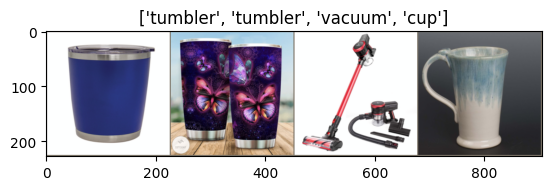

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

 - 학습할 CNN 딥러닝 모델 객체를 초기화

In [24]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 77.3MB/s]


 - 학습진행

In [26]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#0 Loss: 0.8421 Acc: 54.4643% Time: 63.3242s
#1 Loss: 0.5853 Acc: 82.1429% Time: 124.6508s
#2 Loss: 0.3283 Acc: 85.7143% Time: 185.9205s
#3 Loss: 0.2747 Acc: 90.1786% Time: 246.0195s
#4 Loss: 0.2144 Acc: 91.9643% Time: 307.1171s
#5 Loss: 0.1904 Acc: 93.7500% Time: 367.1041s
#6 Loss: 0.2317 Acc: 91.0714% Time: 428.6664s
#7 Loss: 0.2210 Acc: 92.8571% Time: 488.5582s
#8 Loss: 0.2098 Acc: 91.0714% Time: 549.8330s
#9 Loss: 0.1299 Acc: 94.6429% Time: 611.2659s
#10 Loss: 0.0972 Acc: 96.4286% Time: 672.8204s
#11 Loss: 0.0731 Acc: 97.3214% Time: 733.8483s
#12 Loss: 0.0426 Acc: 98.2143% Time: 795.8451s
#13 Loss: 0.1280 Acc: 94.6429% Time: 856.8344s
#14 Loss: 0.1070 Acc: 95.5357% Time: 919.1153s
#15 Loss: 0.2522 Acc: 91.9643% Time: 979.7187s
#16 Loss: 0.4213 Acc: 91.0714% Time: 1043.9258s
#17 Loss: 0.1353 Acc: 94.6429% Time: 1104.4888s
#18 Loss: 0.0413 Acc: 100.0000% Time: 1166.6972s
#19 Loss: 0.3316 Acc: 91.0714% Time: 1226.9061s
#20 Loss: 0.1584 Acc: 93.7500% Time: 1288.3244s
#21 Loss: 0.0692 A

 - 학습된 모델 평가

[predict: cup] (answer: cup)


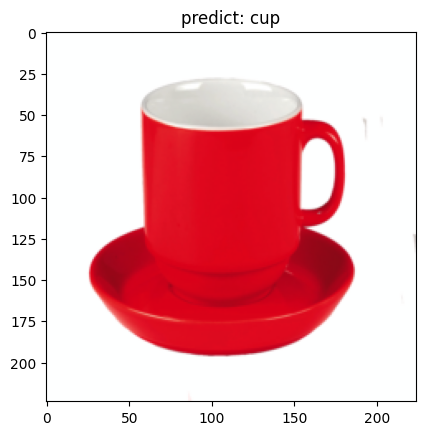

[predict: cup] (answer: cup)


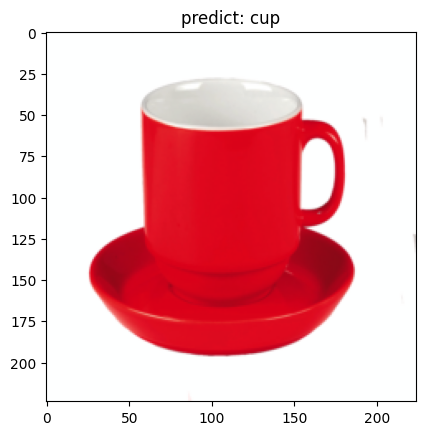

[predict: cup] (answer: cup)


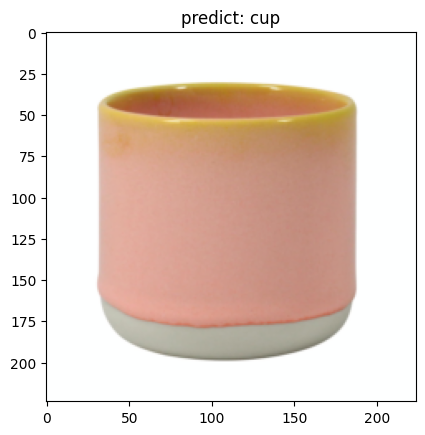

[predict: cup] (answer: cup)


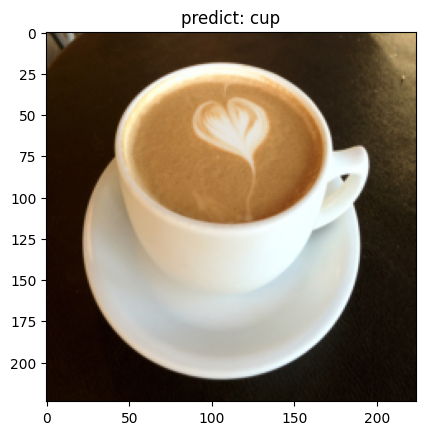

[predict: vacuum] (answer: vacuum)


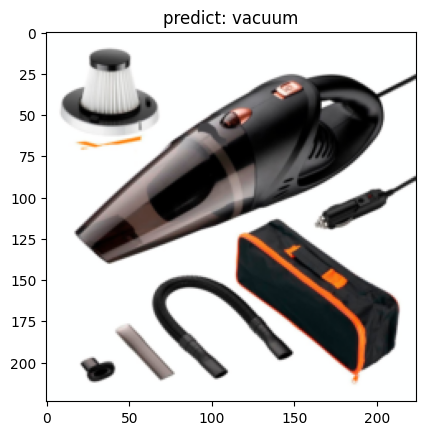

[predict: cup] (answer: cup)


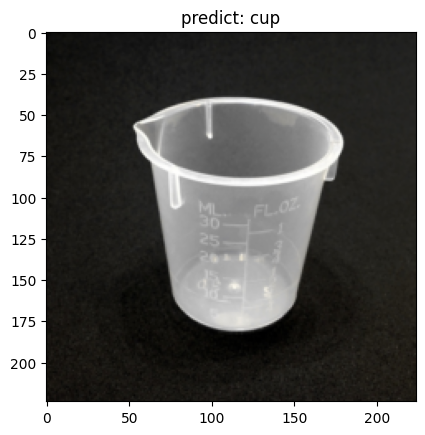

[predict: cup] (answer: cup)


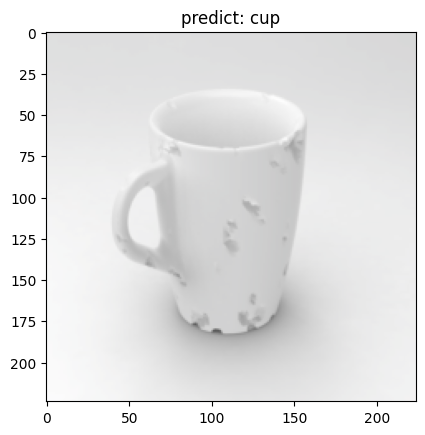

[predict: cup] (answer: cup)


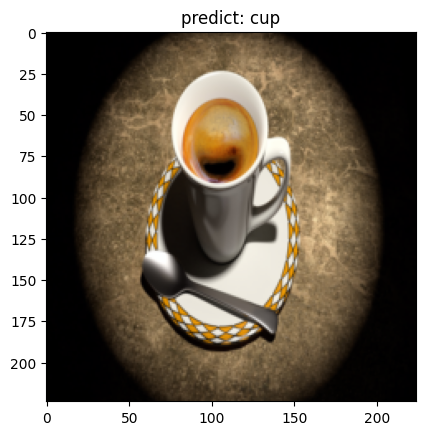

[predict: tumbler] (answer: tumbler)


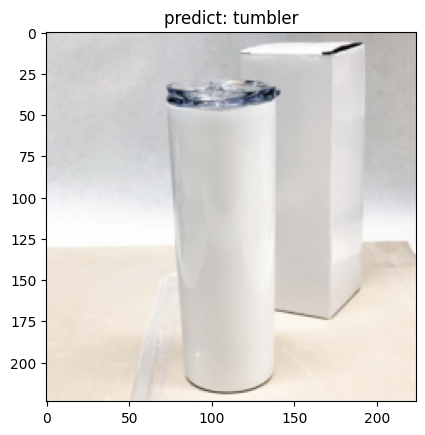

[predict: tumbler] (answer: tumbler)


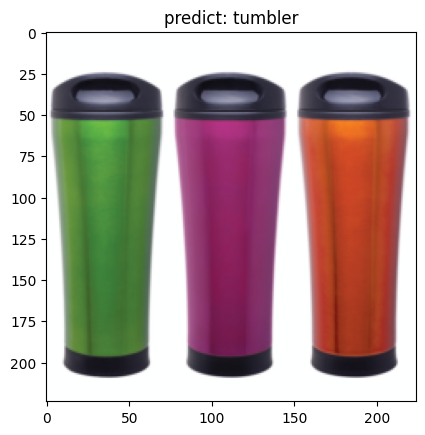

[predict: tumbler] (answer: tumbler)


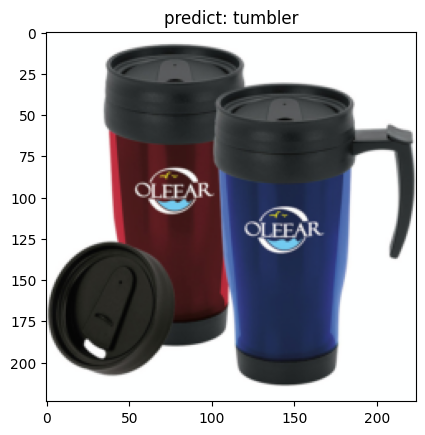

[predict: tumbler] (answer: tumbler)


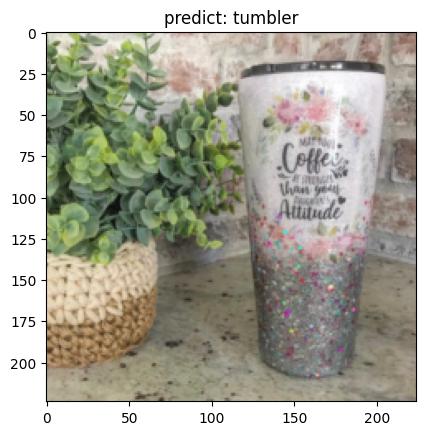

[predict: cup] (answer: cup)


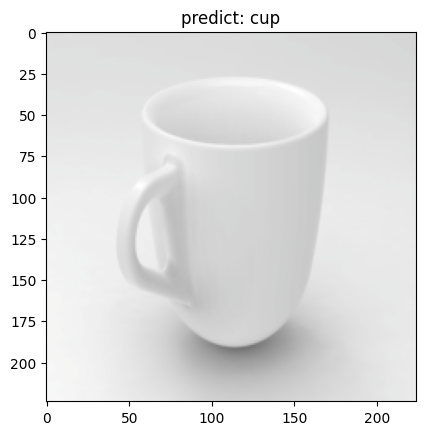

[Test Phase] Loss: 0.1602 Acc: 96.0000% Time: 16.4306s


In [29]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[predict: {class_names[preds[0]]}] (answer: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='predict: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

3. 분류 모델 API 개발

- 학습된 분류 모델을 사용할 수 있도록 API를 개발하여 배포

- 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능 작성

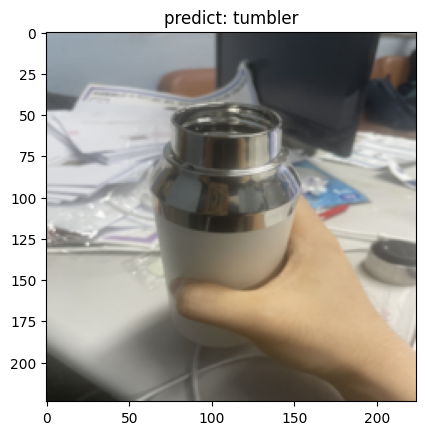

In [41]:
from PIL import Image


image = Image.open('test.jpg')
image.LOAD_TRUNCATED_IMAGES = True
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='predict: ' + class_names[preds[0]])

 - 웹 API 개방을 위해 Ngrok 서비스를 이용합니다.
 
 - API 기능 제공을 위해 Flask 프레임워크를 사용합니다.

In [42]:

# 필요한 라이브러리 설치하기
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='predict: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("result:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

 - API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.

 - 서버 주소를 정확히 확인할 필요가 있습니다.

In [47]:
run_with_ngrok(app)
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://0f39-34-67-228-238.ngrok.io * Running on http://0f39-34-67-228-238.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
 * Traffic stats available on http://127.0.0.1:4040

 * Running on http://0f39-34-67-228-238.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
 * Running on http://0f39-34-67-228-238.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


 - 클라이언트 테스트 방법

> curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}

 - 사용 예시

> curl -X POST -F file=@dongseok.jpg http://44c8-34-67-228-238.ngrok.io


